## Time resampling
- 시간 기준으로 데이터 aggregation
- group by와 유사

### Bike Sharing Demand

In [15]:
import pandas as pd
import os

In [19]:
DATA_DIR = "bike_demand"
TRAIN_PATH = os.path.join(DATA_DIR, "train.csv")

In [38]:
df = pd.read_csv(TRAIN_PATH, parse_dates=["datetime"])
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [39]:
from datetime import datetime

datetime.strptime(df["datetime"], '%Y/%m/%d %H:%M:%S').date()


TypeError: strptime() argument 1 must be str, not Series

In [40]:
df = df.set_index("datetime")
df.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

In [43]:
df["month"] = df.index.month
df["year"] = df.index.year

In [46]:
df.groupby(["year", "month"])["count"].sum().reset_index()

,year,month,count
0,2011,1,23552
1,2011,2,32844
2,2011,3,38735
3,2011,4,50517
4,2011,5,79713
5,2011,6,89776
6,2011,7,92848
7,2011,8,83296
8,2011,9,79104
9,2011,10,79522


### resampling

<AxesSubplot: xlabel='datetime'>

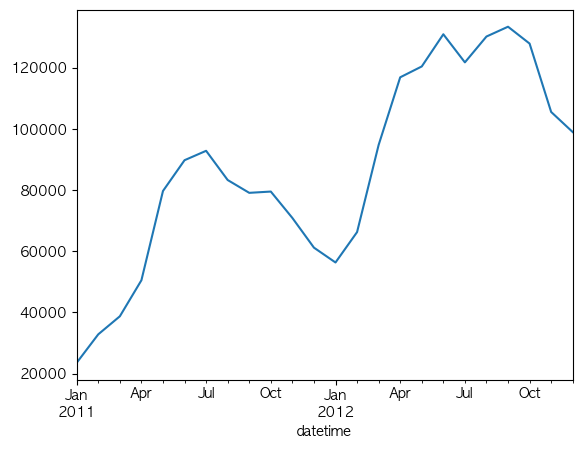

In [50]:
df["count"].resample("M").sum().plot()

### resampling - filter
- something_range 함수로 기간 생성: filter 지정

In [53]:
period = pd.date_range(start="2011-01-01", end="2012-01-30", freq="M")
df["count"].resample("M").sum()[period]

2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
2011-06-30    89776
2011-07-31    92848
2011-08-31    83296
2011-09-30    79104
2011-10-31    79522
2011-11-30    70889
2011-12-31    61183
Freq: M, Name: count, dtype: int64

In [55]:
period = pd.date_range(start="2011-01-01", periods=12, freq="M")
df["count"].resample("M").sum()[period]

2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
2011-06-30    89776
2011-07-31    92848
2011-08-31    83296
2011-09-30    79104
2011-10-31    79522
2011-11-30    70889
2011-12-31    61183
Freq: M, Name: count, dtype: int64

<AxesSubplot: xlabel='datetime'>

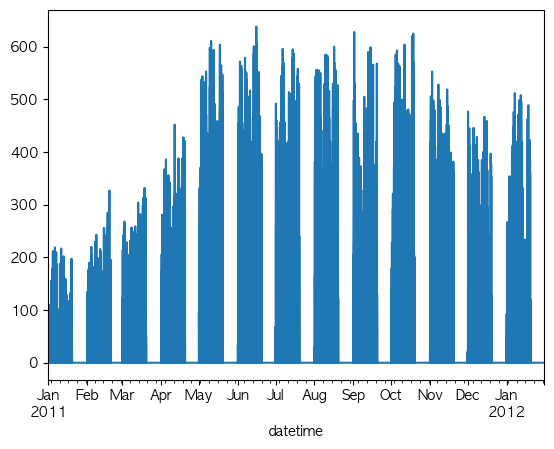

In [59]:
period = pd.date_range(start="2011-01-01", end="2012-01-30", freq="M")
df["count"].resample("3T").sum()["2011-01-01":"2012-01-30"].plot()

In [60]:
df["dayofweek"] = df.index.dayofweek

<AxesSubplot: xlabel='dayofweek'>

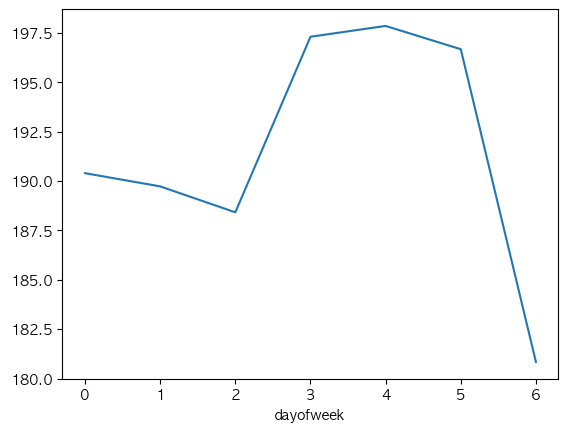

In [64]:
df.groupby("dayofweek")["count"].mean().plot()